Cleaned Columns: ['CompanyMaker-if_known', 'Specific_Bean_Originor_Bar_Name', 'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType', 'Broad_BeanOrigin']

Total rows: 1793
Unique companies: 416
Reviews in 2013: 184
Missing BeanType values: 0


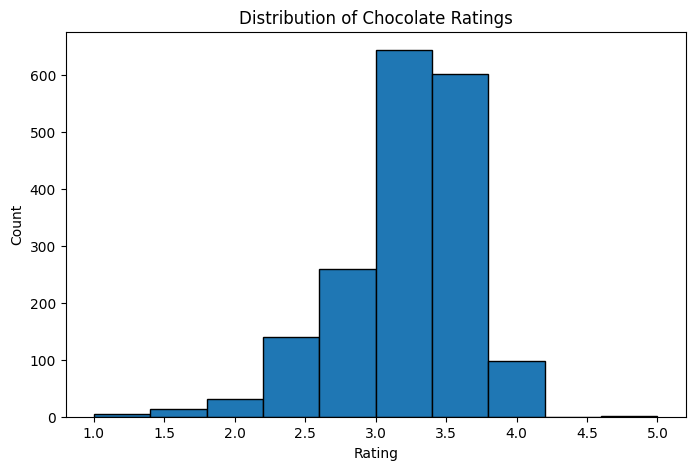

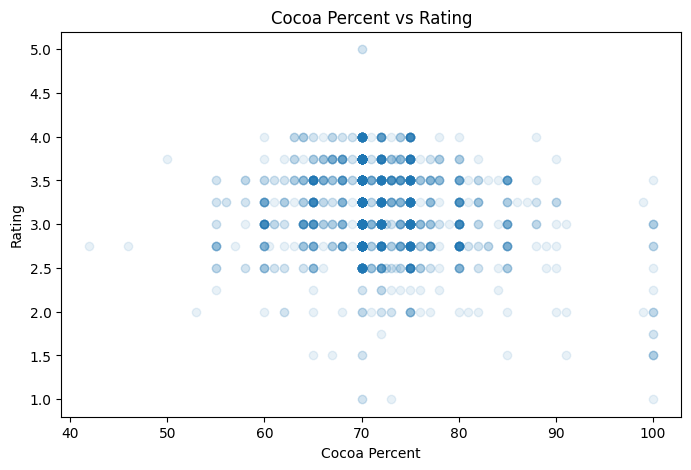


Sample normalized ratings:
    Rating  RatingNormalized
0    3.75            0.6875
1    2.75            0.4375
2    3.00            0.5000
3    3.50            0.6250
4    3.50            0.6250

Top 5 companies by average rating:
 CompanyMaker-if_known
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Amedei                                  3.846154
Matale                                  3.812500
Name: Rating, dtype: float64

Sample encoded columns:
   CompanyMaker-if_known  Company_Encoded CompanyLocation  \
0              A. Morin                0          France   
1              A. Morin                0          France   
2              A. Morin                0          France   
3              A. Morin                0          France   
4              A. Morin                0          France   

   CompanyLocation_Encoded  
0                       18  
1                       1

In [2]:
# Chocolate Mini Project - Fully Working Notebook
# Author: Nishant Bihola
# Dataset: flavors_of_cacao.csv (Kaggle)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1️⃣ Load dataset
df = pd.read_csv("flavors_of_cacao.csv")

# 2️⃣ Clean column names safely (Python 3.12 compatible)
df.columns = (
    df.columns
    .str.strip()                   # remove leading/trailing spaces
    .str.replace('\r','', regex=True)
    .str.replace('\n','', regex=True)
    .str.replace('\xa0','', regex=True)
    .str.replace(' ', '_', regex=True)
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

# 3️⃣ Print cleaned columns to know exact names
print("Cleaned Columns:", df.columns.tolist())

# 4️⃣ Map correct column names dynamically
# Replace with the exact column names printed above
company_col = [col for col in df.columns if 'Company' in col and 'Maker' in col][0]
review_col = [col for col in df.columns if 'Review' in col][0]
bean_col = [col for col in df.columns if 'Bean' in col and 'Type' in col][0]
cocoa_col = [col for col in df.columns if 'Cocoa' in col][0]
location_col = [col for col in df.columns if 'Company' in col and 'Location' in col][0]

# 5️⃣ Drop missing values
df.dropna(inplace=True)

# 6️⃣ Explore dataset
print("\nTotal rows:", len(df))
print("Unique companies:", df[company_col].nunique())
print("Reviews in 2013:", df[df[review_col] == 2013].shape[0])
print("Missing BeanType values:", df[bean_col].isna().sum())

# 7️⃣ Histogram of Ratings
plt.figure(figsize=(8,5))
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title("Distribution of Chocolate Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 8️⃣ Convert Cocoa Percent to numeric
df[cocoa_col] = df[cocoa_col].str.rstrip('%').astype(float)

# 9️⃣ Scatter plot: Cocoa Percent vs Rating
plt.figure(figsize=(8,5))
plt.scatter(df[cocoa_col], df['Rating'], alpha=0.1)
plt.title("Cocoa Percent vs Rating")
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.show()

# 🔟 Normalize Ratings
scaler = MinMaxScaler()
df['RatingNormalized'] = scaler.fit_transform(df[['Rating']])
print("\nSample normalized ratings:\n", df[['Rating','RatingNormalized']].head())

# 1️⃣1️⃣ Average rating per company
avg_rating = df.groupby(company_col)['Rating'].mean().sort_values(ascending=False)
print("\nTop 5 companies by average rating:\n", avg_rating.head())

# 1️⃣2️⃣ Encode categorical columns
encoder = LabelEncoder()
df['Company_Encoded'] = encoder.fit_transform(df[company_col])
df['CompanyLocation_Encoded'] = encoder.fit_transform(df[location_col])

print("\nSample encoded columns:\n", df[[company_col,'Company_Encoded',location_col,'CompanyLocation_Encoded']].head())
